### Mapping the Krafla Region in Iceland with Geological Features
<br />
<div style="text-align: justify">In this notebook, the region of interest for this study is shown together with all its geological characteristics including fissure swarms, faults, active and central volcanoes.</div>

In [1]:
# Read all the required libraries 
import pygmt
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from pyproj import CRS
from shapely.geometry import shape, box, Point

C:\Users\Jbies\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Jbies\anaconda3\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
C:\Users\Jbies\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load all the shape files (either csv or geojson files)
gps_sites = pd.read_csv('../Coding/ITRF_xyz_sites.csv')

boundaries = pd.read_json('Shapes/plate_boundaries.json') # Reference [1]

# Make the coordinates a point and add as geometry in the geopandas
geometry = [Point(xy) for xy in zip(gps_sites['x'], gps_sites['y'])]
gdf_sites = gpd.GeoDataFrame(gps_sites, geometry=geometry)

# Reference [2] for all of the Geojson files below
gdf_boundaries = gpd.GeoDataFrame.from_features(
    boundaries['features']
).set_crs('epsg:4326')

faults = gpd.read_file(
    "Shapes/Fault related to active volcanic zone.geojson"
).to_crs("EPSG:4326")

fissure = gpd.read_file(
    "Shapes/Eruptive fissure (Holocene).geojson"
).to_crs("EPSG:4326")

volcanos = gpd.read_file(
    "Shapes/volcanos.geojson"
).to_crs("EPSG:4326")

swarm_outline = gpd.read_file(
    "Shapes/swarm_outline.geojson"
).to_crs("EPSG:4326")

mogi = gpd.read_file(
    "Shapes/mogi.geojson"
).to_crs("EPSG:4326")

# Specify the region of the entire map
region_map = [
    gdf_sites.x.min() - 1.25,
    gdf_sites.x.max() + 1,
    gdf_sites.y.min() - 1.0,
    gdf_sites.y.max() + 0.5,
]

# Specify the region of the inset
region_iceland = [
    gdf_sites.x.min() - 7,
    gdf_sites.x.max() + 3,
    gdf_sites.y.min() - 2.5,
    gdf_sites.y.max() + 1,
]

# Make a grid based on the region of interest
grid = pygmt.datasets.load_earth_relief(
    resolution="15s", region=region_map
)

grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -18.8286099 to -18.8291666667
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from 64.52241902 to 64.5208333333
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 66.46840853 to 66.4708333333


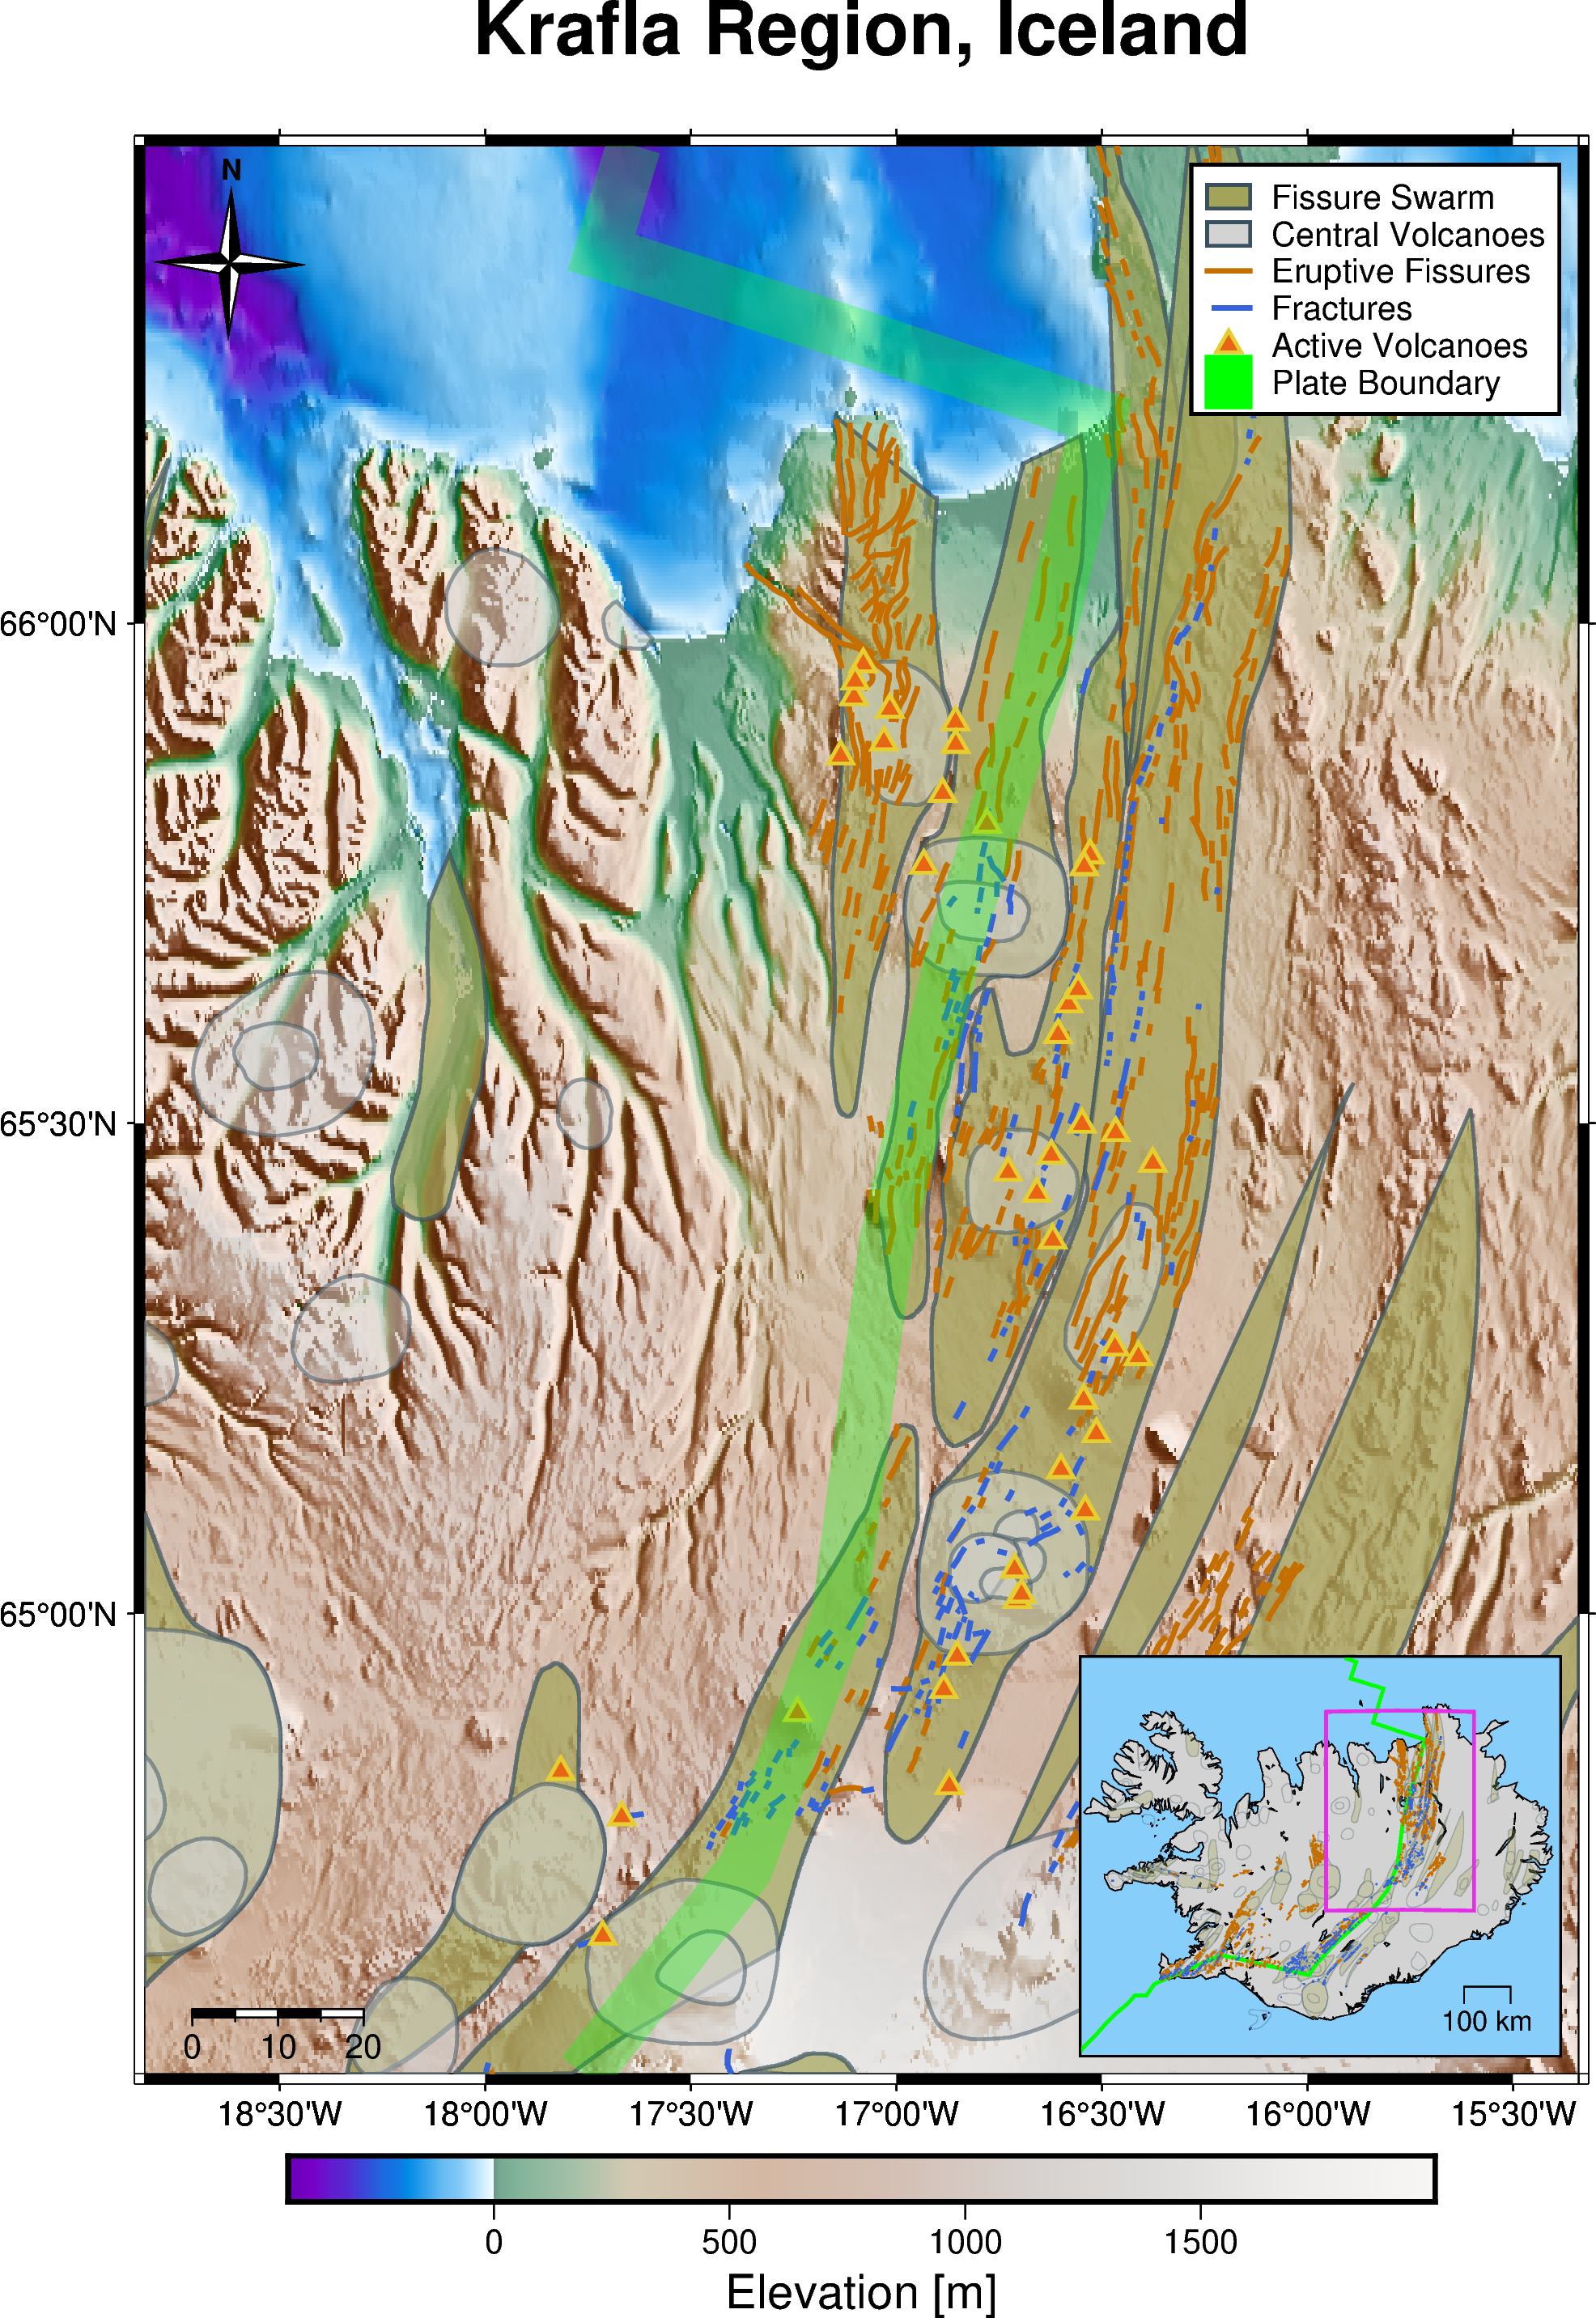

In [7]:
# Make a new PyGMT figure including all its features 
fig = pygmt.Figure()
fig.basemap(region=region_map, projection="M15", frame=["f", "a", "+tKrafla Region, Iceland"])

shade = pygmt.grdgradient(grid=grid, azimuth="0/90", normalize="t1")
fig.grdimage(grid=grid, shading=shade, frame="a", projection="M15", cmap="terra")
fig.colorbar(frame=["a500", "x+lElevation [m]"])

fig.plot(data=swarm_outline, pen="1p,#39505f+e", fill="#a3a459", transparency=30, label="Fissure Swarm")
fig.plot(data=mogi, pen="1p,#39505f", fill="lightgray", transparency=50, label="Central Volcanoes")

fig.plot(data=faults, pen="1.5p,#c56f00", label="Eruptive Fissures")
fig.plot(data=fissure, pen="1.5p,#3763d8,--.", label="Fractures")
fig.plot(data=volcanos, style="t0.3c", pen="1p,#e6ce30", fill="#e76514", label="Active Volcanoes")

fig.plot(data=gdf_boundaries, pen="16p,green", transparency=70, label="Plate Boundary")

# Make a rose, indicating the North
fig.basemap(rose='jTL+w1.5c+f1+l",,,N"')

# Make a map scale
with pygmt.config(FONT_TITLE=8):
    fig.basemap(map_scale="jBL+w20k+o0.5c/0.5c+f")

# Make the inset, indicating the region of interest, with all of its features
with fig.inset(position="jBR+w5c/4.15c+o0.2c/0.2c", box="+pblack"):
    fig.coast(
        region=region_iceland, projection="M?", borders=[1, 2],
        land="lightgray", water="lightskyblue",
        shorelines="0.3p,black", map_scale="n0.85/0.15+l+c127.7/34.95+w100"
    )
    fig.plot(data=swarm_outline, pen=".2p,#39505f", fill="#a3a459", transparency=70)
    fig.plot(data=mogi, pen=".2p,#39505f", transparency=70)
    fig.plot(data=gdf_boundaries, pen="1p,green")
    fig.plot(data=faults, pen=".5p,#c56f00")
    fig.plot(data=fissure, pen=".5p,#3763d8,--.")

    rectangle = [[region_map[0], region_map[2], region_map[1], region_map[3]]]
    fig.plot(data=rectangle, projection="M?", style="r+s", pen="1p,#e330e6")

fig.legend()
fig.savefig("krafla_region.pdf")
fig.show()

### References

[1] Bird, P. (2003). An updated digital model of plate boundaries. *Geochemistry Geophysics Geosystems, 4*(3). https://doi.org/10.1029/2001gc000252 \
[2] All of the <code>.geojson</code> files were obtained via the ISLKrafla project, provided by Hans van der Marel, Delft Univeristy of Technology, June 2023